<a href="https://colab.research.google.com/github/MickaRiv/ProjetDatascientest-VoiceSeparator/blob/main/notebooks/benchmark_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install nussl et import systématiques

## Install de nussl

In [1]:
# à ne faire qu'une fois pour installer le paquet nussl
!pip install nussl

## Imports

In [2]:
# Chargement des paquets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import librosa
import nussl
import numpy as np
import os,sys
import importlib # pour mise à jour des lib en développement


SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Montage du drive et du working directory

Montage du drive

In [3]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")  # we mount the google drive at /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Si développements et besoin de lib locales qui sont dans src, on se déplace sur le clone de git pour développement

In [ ]:
#%cd /content/drive/MyDrive/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator
#%ls
sys.path.append(os.path.join("/content",
                             "drive",
                             "MyDrive",
                             "Projet Datascientest",
                             "cloned_git_Ephi",
                             "ProjetDatascientest-VoiceSeparator")
#os.chdir(os.path.join("drive","MyDrive","Projet Datascientest","cloned_git_Ephi","ProjetDatascientest-VoiceSeparator"))
%reload_ext autoreload
%autoreload 2

/content/drive/.shortcut-targets-by-id/1jB0u0zpR4h_lQKx54NiMAOt1_XxP5nSg/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator
notebooks/  README.md  voice-separator/


Alternativement, possibilité d'utiliser directement la version actuelle de la librairie sur GitHub

In [4]:
!pip install git+https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator

  Cloning https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator to /tmp/pip-req-build-5w07ygrw
  Running command git clone -q https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator /tmp/pip-req-build-5w07ygrw


# Comparaison sur toutes les musiques


## Téléchargement des données

In [5]:
# Récupération de la base de données musdb18 depuis google drive
from voicesep.core import get_musdb_data

path = os.path.join("/content",
                    "drive",
                    "MyDrive",
                    "Projet Datascientest",
                    "musdb18")
musdb = get_musdb_data(gather_accompaniment=True,folder=path)
musdb_train = get_musdb_data(gather_accompaniment=True,folder=path,subfolder="train")
musdb_test = get_musdb_data(gather_accompaniment=True,folder=path,subfolder="test")

## Modèles de séparation de voix existants

In [6]:
from voicesep.models import evaluate_dict_models

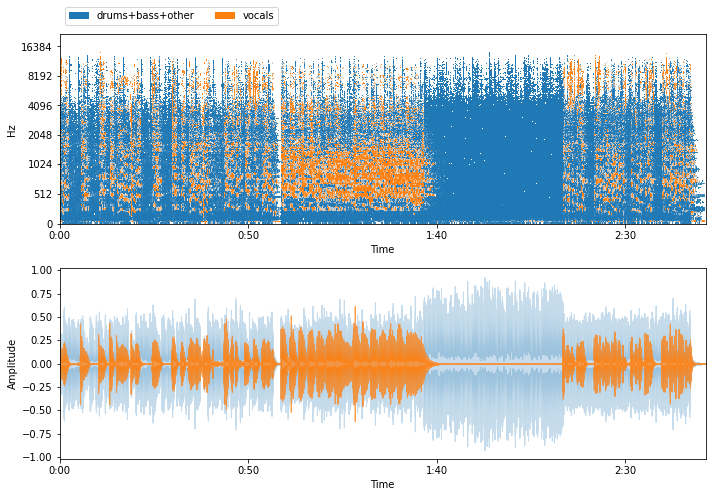


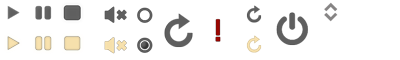
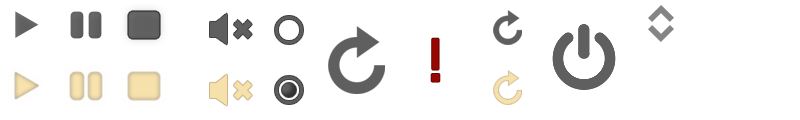
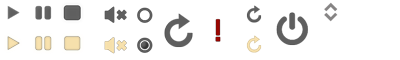

In [7]:
i = 0
item = musdb[i]
mix = item['mix']
sources = item['sources']
truth = [sources['drums+bass+other'], sources['vocals']]

from voicesep.dataviz import visualize_and_embed
visualize_and_embed(sources)

In [9]:
for i in range(1):
  item = musdb[i]
  mix = item["mix"]
  sources = item['sources']
  truth = [sources['drums+bass+other'], sources['vocals']]
  sep_class_dict = {
                    "High-Low Pass": nussl.separation.benchmark.HighLowPassFilter(mix, 1000),
                    "Ideal Binary Mask": nussl.separation.benchmark.IdealBinaryMask(mix,truth),
                   }
  scores = evaluate_dict_models(sep_class_dict, truth, visualize=False, report=False)

In [10]:
scores

accompaniment             ...      voice           
                         SI-SDR     SI-SIR  ... MIX-SD-SDR    MIX-SNR
Alg                                         ...                      
High-Low Pass          6.063587  11.994441  ... -11.034173 -11.033319
Ideal Binary Mask     19.557332  30.842880  ... -11.034173 -11.033319

[2 rows x 24 columns]